In [1]:
!pip install numpy pandas seaborn matplotlib

In [7]:
# Import required libraries
import os
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("All required libraries are installed.")
print(f"pandas version: {pd.__version__}")

file_url = "https://raw.githubusercontent.com/jsitera/GreenComputing/refs/heads/main/data/ENTSO-E/electricity-prices-2024.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_url)
    print("Dataset loaded successfully:")
    print(df.head())
except Exception as e:
    print(f"Error loading file: {str(e)}")
    raise

# Define columns
datetime_col = 'MTU (CET/CEST)'  # Time interval column (DD/MM/YYYY HH:MM:SS)
price_col = 'Day-ahead Price (EUR/MWh)'  # Day-ahead price in €/MWh

# Check if expected columns exist
missing_cols = [col for col in [datetime_col, price_col] if col not in df.columns]
if missing_cols:
    print(f"Error: Missing columns {missing_cols}. Available columns: {df.columns.tolist()}")
    raise ValueError("Missing required columns")

# Convert datetime column to pandas datetime
# MTU (CET/CEST) format: e.g., '01/01/2024 00:00:00 - 01/01/2024 01:00:00'
# Extract start time and parse with DD/MM/YYYY HH:MM:SS format
try:
    # Remove anything like '(CET)' before parsing
    df[datetime_col] = df[datetime_col].str.split('-').str[0].str.replace(r'\s*\(.*\)', '', regex=True).str.strip()
    df[datetime_col] = pd.to_datetime(df[datetime_col], format='%d/%m/%Y %H:%M:%S', errors='coerce')
except Exception as e:
    print(f"Error converting '{datetime_col}' to datetime: {str(e)}")
    print("Inspect datetime format:")
    print(df[datetime_col].head())
    print("Expected format: 'DD/MM/YYYY HH:MM:SS', e.g., '01/01/2024 00:00:00'")
    raise

# Print price statistics to confirm scale
print("Day-ahead Price statistics (€/MWh):")
print(df[price_col].describe())

# Extract day of year and hour for pivot table
df['day_of_year'] = df[datetime_col].dt.dayofyear
df['hour'] = df[datetime_col].dt.hour



All required libraries are installed.
pandas version: 2.2.2
Dataset loaded successfully:
                              MTU (CET/CEST)    Area          Sequence  \
0  01/01/2024 00:00:00 - 01/01/2024 01:00:00  BZN|CZ  Without Sequence   
1  01/01/2024 01:00:00 - 01/01/2024 02:00:00  BZN|CZ  Without Sequence   
2  01/01/2024 02:00:00 - 01/01/2024 03:00:00  BZN|CZ  Without Sequence   
3  01/01/2024 03:00:00 - 01/01/2024 04:00:00  BZN|CZ  Without Sequence   
4  01/01/2024 04:00:00 - 01/01/2024 05:00:00  BZN|CZ  Without Sequence   

   Day-ahead Price (EUR/MWh)  Intraday Period (CET/CEST)  \
0                       0.10                         NaN   
1                       0.01                         NaN   
2                       0.02                         NaN   
3                       0.00                         NaN   
4                      -0.01                         NaN   

   Intraday Price (EUR/MWh)  
0                       NaN  
1                       NaN  
2              

Heatmap saved to heatmap_electricity_price_CZ_2024.png


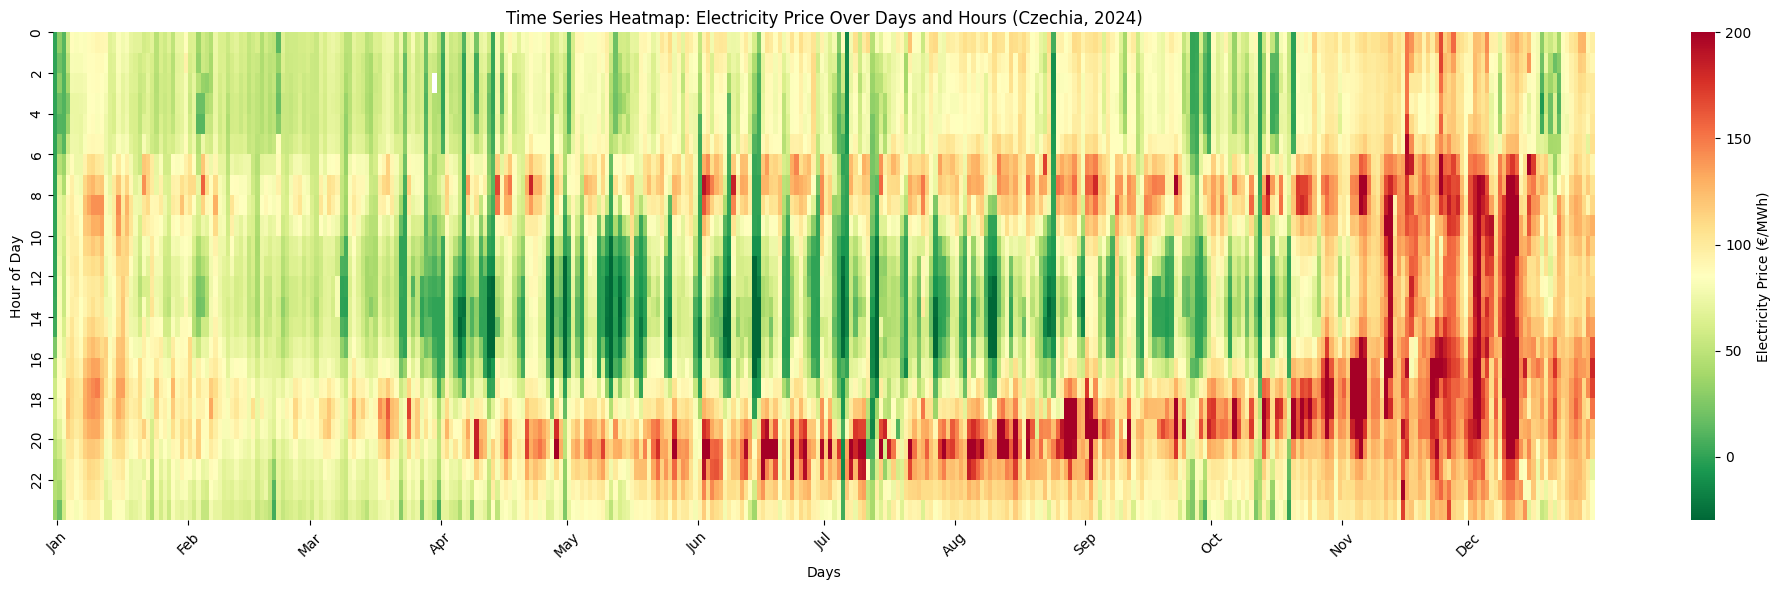

In [8]:
# Create a pivot table for the heatmap (hours vs. days)
pivot_table = df.pivot_table(index='hour', columns='day_of_year', values=price_col, aggfunc='mean')

# Plot the heatmap with fixed price scale
plt.figure(figsize=(20, 6))  # Match snippet figure size
sns.heatmap(pivot_table, cmap='RdYlGn_r', cbar_kws={'label': 'Electricity Price (€/MWh)'}, vmin=-30, vmax=200)
plt.title(f"Time Series Heatmap: Electricity Price Over Days and Hours (Czechia, 2024)")
plt.xlabel("Days")
plt.ylabel("Hour of Day")

# Customize x-axis with month start dates
year = 2024
month_starts = [datetime(year, m, 1) for m in range(1, 13)]  # Jan 1, Feb 1, ..., Dec 1
start_date = pd.Timestamp(f"{year}-01-01")  # Start of the year
days_since_start = [(d - start_date).days + 1 for d in month_starts]  # Convert to day-of-year indices
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(days_since_start, month_labels, rotation=45)

# Customize y-axis to show every 2 hours
plt.yticks(np.arange(0, 24, 2), range(0, 24, 2))

plt.tight_layout()

# Save the plot to a file
output_file = f"heatmap_electricity_price_CZ_2024.png"
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"Heatmap saved to {output_file}")

# Show the plot
plt.show()

Correlation between Carbon intensity and Day-ahead Price: 0.55


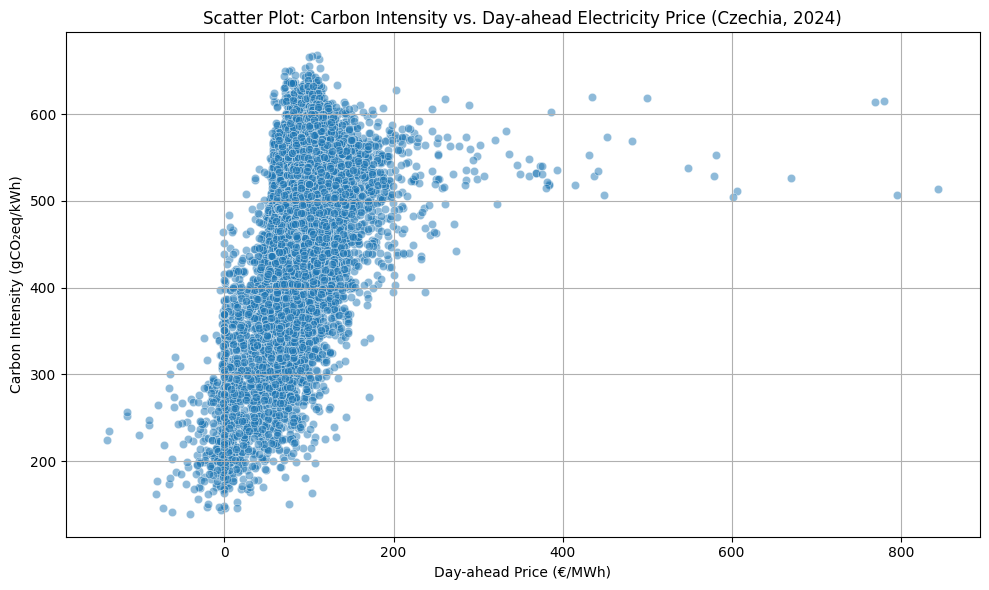

In [12]:
# Calculate the correlation between the two columns
correlation = merged_df['Carbon intensity gCO₂eq/kWh (direct)'].corr(merged_df['Day-ahead Price (EUR/MWh)'])

print(f"Correlation between Carbon intensity and Day-ahead Price: {correlation:.2f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Day-ahead Price (EUR/MWh)', y='Carbon intensity gCO₂eq/kWh (direct)', alpha=0.5)
plt.title('Scatter Plot: Carbon Intensity vs. Day-ahead Electricity Price (Czechia, 2024)')
plt.xlabel('Day-ahead Price (€/MWh)')
plt.ylabel('Carbon Intensity (gCO₂eq/kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

Hourly correlation between Carbon intensity and Day-ahead Price:
hour_y
0     0.565327
1     0.614425
2     0.638026
3     0.638231
4     0.600491
5     0.574733
6     0.524614
7     0.522549
8     0.600160
9     0.714641
10    0.769079
11    0.783917
12    0.783462
13    0.774570
14    0.755112
15    0.680412
16    0.565609
17    0.480537
18    0.458195
19    0.375577
20    0.282309
21    0.348477
22    0.442491
23    0.528307
Name: (Carbon intensity gCO₂eq/kWh (direct), Day-ahead Price (EUR/MWh)), dtype: float64


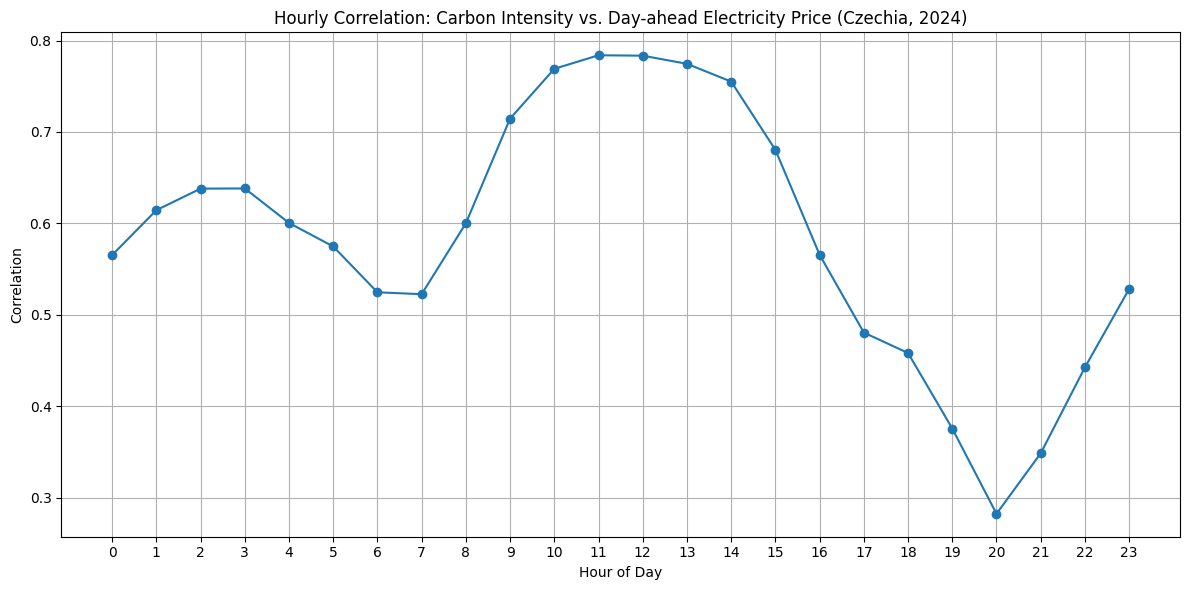

In [14]:
# Calculate hourly correlation
hourly_correlation = merged_df.groupby('hour_y')[['Carbon intensity gCO₂eq/kWh (direct)', 'Day-ahead Price (EUR/MWh)']].corr().unstack().iloc[:, 1]

print("Hourly correlation between Carbon intensity and Day-ahead Price:")
print(hourly_correlation)

# Visualize the hourly correlation
plt.figure(figsize=(12, 6))
hourly_correlation.plot(kind='line', marker='o')
plt.title('Hourly Correlation: Carbon Intensity vs. Day-ahead Electricity Price (Czechia, 2024)')
plt.xlabel('Hour of Day')
plt.ylabel('Correlation')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Monthly correlation between Carbon intensity and Day-ahead Price:
month
1     0.560713
2     0.482062
3     0.641108
4     0.641755
5     0.652834
6     0.665339
7     0.675517
8     0.627405
9     0.580824
10    0.537279
11    0.051319
12    0.311557
Name: (Carbon intensity gCO₂eq/kWh (direct), Day-ahead Price (EUR/MWh)), dtype: float64


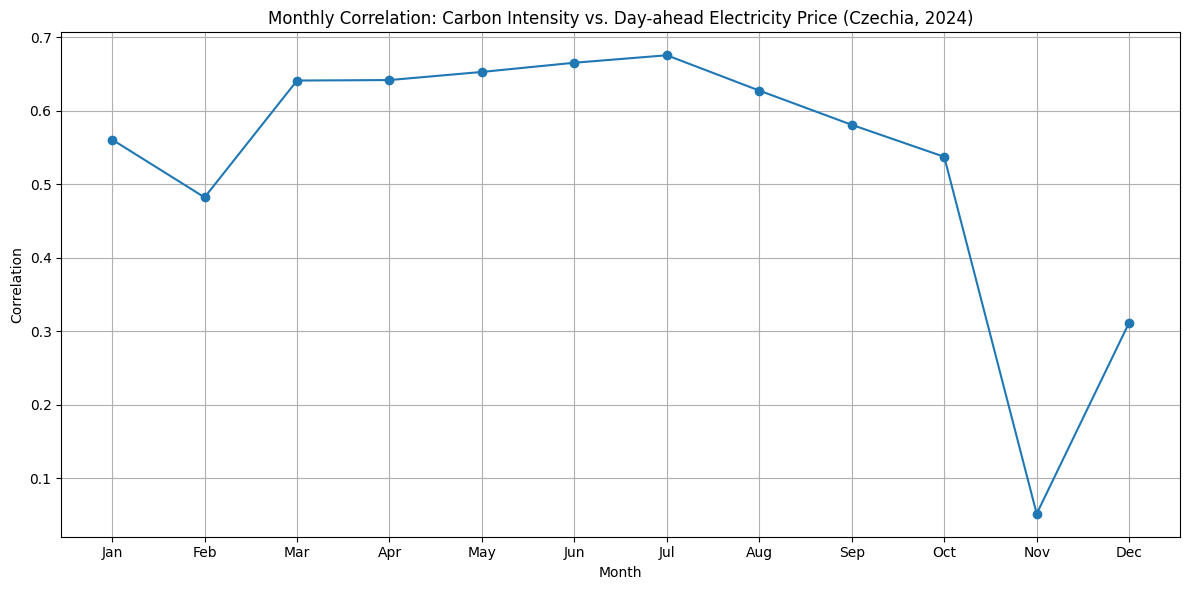

In [16]:
# Extract month from the datetime column
merged_df['month'] = merged_df['Datetime (UTC)_utc'].dt.month

# Calculate monthly correlation
monthly_correlation = merged_df.groupby('month')[['Carbon intensity gCO₂eq/kWh (direct)', 'Day-ahead Price (EUR/MWh)']].corr().unstack().iloc[:, 1]

print("Monthly correlation between Carbon intensity and Day-ahead Price:")
print(monthly_correlation)

# Visualize the monthly correlation
plt.figure(figsize=(12, 6))
monthly_correlation.plot(kind='line', marker='o')
plt.title('Monthly Correlation: Carbon Intensity vs. Day-ahead Electricity Price (Czechia, 2024)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Calculate Rolling Correlation
# Calculate rolling correlation over a 24-hour window
# We will use the 'Datetime (UTC)_utc' as the index for rolling calculation
merged_df['rolling_correlation'] = merged_df['Carbon intensity gCO₂eq/kWh (direct)'].rolling(window=24).corr(merged_df['Day-ahead Price (EUR/MWh)'])

print("Rolling correlation calculated.")
print(merged_df[['Datetime (UTC)_utc', 'rolling_correlation']].head(30)) # Display first 30 rows as rolling starts after window size

In [19]:
# Step 2: Prepare Data for Heatmap
# Extract day of year and hour for pivot table, similar to the price heatmap
# We can reuse the 'day_of_year' and 'hour' columns created earlier from the 'df' dataframe
# if they are still available in the merged_df, or recreate them from 'Datetime (UTC)_utc'
merged_df['day_of_year'] = merged_df['Datetime (UTC)_utc'].dt.dayofyear
merged_df['hour'] = merged_df['Datetime (UTC)_utc'].dt.hour

# Create a pivot table for the heatmap (hours vs. days) using the rolling correlation
# Since rolling correlation produces NaN for the first 'window-1' values,
# the heatmap will show blank spaces for these initial data points.
rolling_corr_pivot_table = merged_df.pivot_table(index='hour', columns='day_of_year', values='rolling_correlation', aggfunc='mean')

print("Pivot table for rolling correlation heatmap created.")
# print(rolling_corr_pivot_table.head()) # Optional: display head of the pivot table

Pivot table for rolling correlation heatmap created.


Rolling correlation heatmap saved to heatmap_rolling_correlation_CZ_2024.png


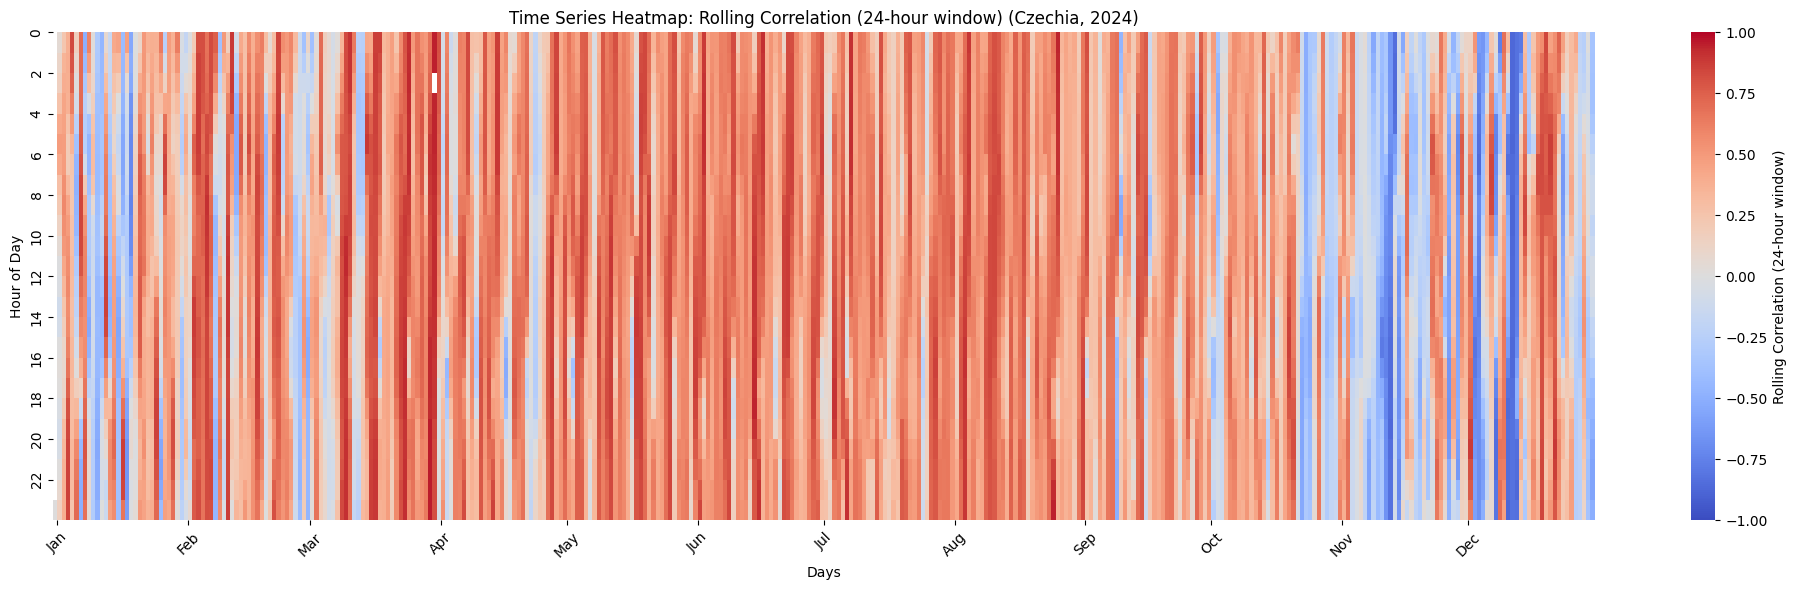

In [20]:
# Step 3: Visualize Rolling Correlation Heatmap
plt.figure(figsize=(20, 6))  # Use similar figure size as the price heatmap
sns.heatmap(rolling_corr_pivot_table, cmap='coolwarm', center=0,
            cbar_kws={'label': 'Rolling Correlation (24-hour window)'},
            vmin=-1, vmax=1) # Set limits for correlation

plt.title(f"Time Series Heatmap: Rolling Correlation (24-hour window) (Czechia, 2024)")
plt.xlabel("Days")
plt.ylabel("Hour of Day")

# Customize x-axis with month start dates, similar to the price heatmap
year = 2024
month_starts = [datetime(year, m, 1) for m in range(1, 13)]  # Jan 1, Feb 1, ..., Dec 1
start_date = pd.Timestamp(f"{year}-01-01")  # Start of the year
days_since_start = [(d - start_date).days + 1 for d in month_starts]  # Convert to day-of-year indices
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(days_since_start, month_labels, rotation=45)

# Customize y-axis to show every 2 hours, similar to the price heatmap
plt.yticks(np.arange(0, 24, 2), range(0, 24, 2))

plt.tight_layout()

# Save the plot to a file
output_file_corr = f"heatmap_rolling_correlation_CZ_2024.png"
plt.savefig(output_file_corr, dpi=300, bbox_inches='tight')
print(f"Rolling correlation heatmap saved to {output_file_corr}")

# Show the plot
plt.show()